/users/nicolass80/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/users/nicolass80/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Top 5 predictions for the wolf image:
Label: ['n02114367', 'timber_wolf'] | Confidence: 0.9598718285560608
Label: ['n02114712', 'red_wolf'] | Confidence: 0.02345939353108406
Label: ['n02114855', 'coyote'] | Confidence: 0.010895656421780586
Label: ['n02115641', 'dingo'] | Confidence: 0.0034012936521321535
Label: ['n02114548', 'white_wolf'] | Confidence: 0.0015540611930191517

Top 5 predictions for the apple image:
Label: ['n07742313', 'Granny_Smith'] | Confidence: 0.9942532181739807
Label: ['n02948072', 'candle'] | Confidence: 0.0055453903041779995
Label: ['n07747607', 'orange'] | Confidence: 1.7446582205593586e-05
Label: ['n07720875', 'bell_pepper'] | Confidence: 1.0578819455986377e-05
Label: ['n07753592', 'banana'] | Confidence: 9.836808203544933e-06


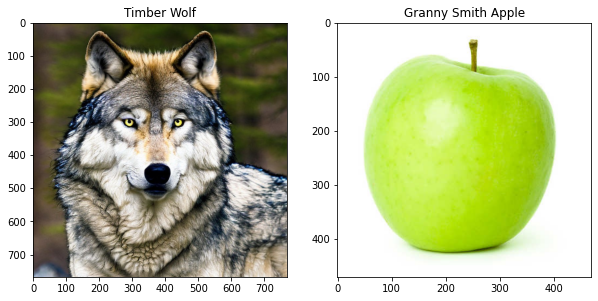

In [292]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import json

with open("map_clsloc.txt") as f:
    dataset_map = f.readlines()
    dataset_map = [x.strip() for x in dataset_map]
    dataset_map = [x.split(" ") for x in dataset_map]
    dataset_map = {x[0]: [x[0],x[2]] for x in dataset_map}


model_map = json.load(open("imagenet_class_index.json"))


# Load a pre-trained model inception v3 and use the apth image as input

model = models.inception_v3(pretrained=True)
model.eval()

# Load the image
img_apple = Image.open("granny_smith.jpg")


# Preprocess the image
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor(),
])

img_tensor_apple = preprocess(img_apple)

# Add a dimension to the image tensor

img_tensor_apple.unsqueeze_(0)

# Get the class labels








# Get the class labels for the image

output_apple = model(img_tensor_apple)

# Get the top 5 predictions

_, indices_apple = torch.sort(output_apple, descending=True)

# Print the top 5 predictions




def modelToData_map(idx):
    synset_id = model_map[str(idx)]
    return dataset_map[synset_id[0]]





#Rpeat the procvess for the wolf image

img_wolf = Image.open("timber_wolf.jpg")

# Preprocess the image

img_tensor_wolf = preprocess(img_wolf)

# Add a dimension to the image tensor

img_tensor_wolf.unsqueeze_(0)

# Get the class labels for the image

output_wolf = model(img_tensor_wolf)

# Get the top 5 predictions

_, indices_wolf = torch.sort(output_wolf, descending=True)

# Print the top 5 predictions


print("Top 5 predictions for the wolf image:")
for idx in indices_wolf[0][:5]:
    print("Label: {} | Confidence: {}".format(modelToData_map(str(idx.item())), torch.softmax(output_wolf, dim=1)[0, idx].item()))

print("\nTop 5 predictions for the apple image:")
for idx in indices_apple[0][:5]:
    print("Label: {} | Confidence: {}".format(modelToData_map(str(idx.item())), torch.softmax(output_apple, dim=1)[0, idx].item()))

    




fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
ax1.imshow(img_wolf)
ax1.set_title("Timber Wolf")
ax2.imshow(img_apple)
ax2.set_title("Granny Smith Apple")
plt.show()

#print("Timber wolf synset id: {}".format(indices_wolf[0][0]), 'n02114367')
#print("Granny Smith Apple synset id: {}".format(indices_apple[0][0]), 'n07742313')









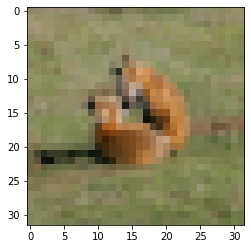

In [291]:
#User pickle to show me a random image of the imagenet32 binary dataset

import pickle
import numpy as np
import matplotlib.pyplot as plt
import random
import PIL  

# Load the data
with open("/users/nicolass80/Documents/PoisonFrogs/Imagenet32_val/val_data", "rb") as f:
    data = pickle.load(f)


labels = data["labels"]
images = data["data"]


#give me all the elements in in data, such that the label is 269

#count the index of the elemtn which has label 269

wolf_idx = [idx for idx, label in enumerate(labels) if label == 1]
wolf_images = images[random.choice(wolf_idx)]


#randimg = wolf_images[random.randint(0, len(wolf_images))]


#USe pytorch to resize the image

#plt.imshow(wolf_images.reshape(32, 32, 3).astype(np.uint8))


def restore_image(arr):
    red_channel = arr[:1024].reshape(32, 32)
    green_channel = arr[1024:2048].reshape(32, 32)
    blue_channel = arr[2048:].reshape(32, 32)

    img = np.dstack((red_channel, green_channel, blue_channel))
    return img.astype(np.uint8)


plt.imshow(restore_image(wolf_images))

--2023-10-16 10:47:52--  https://raw.githubusercontent.com/Evolving-AI-Lab/ppgn/master/misc/map_clsloc.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24366 (24K) [text/plain]
Saving to: ‘map_clsloc.txt’

map_clsloc.txt      100%[===================>]  23.79K  --.-KB/s    in 0.002s  

2023-10-16 10:47:52 (13.6 MB/s) - ‘map_clsloc.txt’ saved [24366/24366]



In [212]:
class_idx

#Read the map_clsloc.txt file as a dictionary with the second element as the key and the first element as the value 


{'1': ['n02119789', 'kit_fox'],
 '2': ['n02100735', 'English_setter'],
 '3': ['n02110185', 'Siberian_husky'],
 '4': ['n02096294', 'Australian_terrier'],
 '5': ['n02102040', 'English_springer'],
 '6': ['n02066245', 'grey_whale'],
 '7': ['n02509815', 'lesser_panda'],
 '8': ['n02124075', 'Egyptian_cat'],
 '9': ['n02417914', 'ibex'],
 '10': ['n02123394', 'Persian_cat'],
 '11': ['n02125311', 'cougar'],
 '12': ['n02423022', 'gazelle'],
 '13': ['n02346627', 'porcupine'],
 '14': ['n02077923', 'sea_lion'],
 '15': ['n02110063', 'malamute'],
 '16': ['n02447366', 'badger'],
 '17': ['n02109047', 'Great_Dane'],
 '18': ['n02089867', 'Walker_hound'],
 '19': ['n02102177', 'Welsh_springer_spaniel'],
 '20': ['n02091134', 'whippet'],
 '21': ['n02092002', 'Scottish_deerhound'],
 '22': ['n02071294', 'killer_whale'],
 '23': ['n02442845', 'mink'],
 '24': ['n02504458', 'African_elephant'],
 '25': ['n02092339', 'Weimaraner'],
 '26': ['n02098105', 'soft-coated_wheaten_terrier'],
 '27': ['n02096437', 'Dandie_Dinm